In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd

In [2]:
mnist= tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print (train_X.shape)
print (train_y.shape)
print (test_X.shape)
print (test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


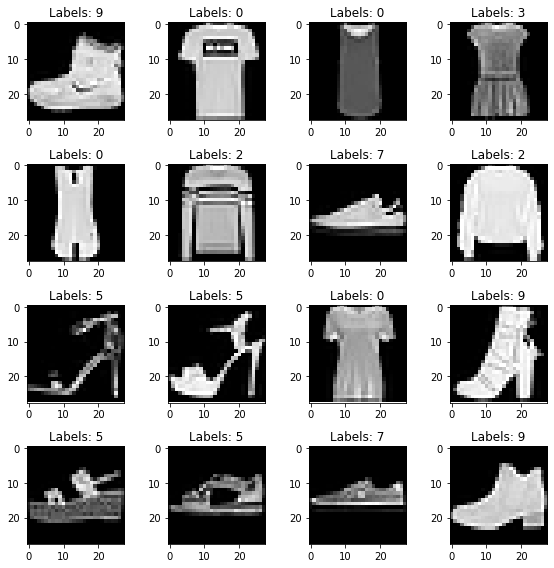

In [4]:
nr = 4
nc = 4

n1 = nr*nc
images = train_X[:n1]
labels = train_y[:n1]

fig, axe = plt.subplots(nr, nc, figsize=(2*nc,2*nr))
for i in range(nr*nc):
    x = axe[i//nr, i%nc]
    x.imshow(images[i], cmap='gray')
    x.set_title('Labels: {}'.format(labels[i]))
plt.tight_layout()    
plt.show()
label_dict ={
0:'T-shirt',
1: 'jeans/Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal/Heels',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Shoes'}

In [5]:
print (train_X.shape)
print (train_X[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [6]:
train_X = train_X/255.0
test_X = test_X/255.0

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 150)               30150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [8]:
history = model.fit(train_X, train_y, epochs=100,validation_split = 0.2, batch_size=64)

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 0.5473 - sparse_categorical_accuracy: 0.8015 - val_loss: 0.4352 - val_sparse_categorical_accuracy: 0.8408
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4145 - sparse_categorical_accuracy: 0.8474 - val_loss: 0.3904 - val_sparse_categorical_accuracy: 0.8557
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3801 - sparse_categorical_accuracy: 0.8582 - val_loss: 0.3604 - val_sparse_categorical_accuracy: 0.8668
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3569 - sparse_categorical_accuracy: 0.8677 - val_loss: 0.3418 - val_sparse_categorical_accuracy: 0.8767
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3411 - sparse_categorical_accuracy: 0.8709 - val_loss: 0.3425 - val_sparse_categorical_accuracy: 0.8816
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3243 - sparse_cate

750/750 [==============================] - 2s 3ms/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9325 - val_loss: 0.3406 - val_sparse_categorical_accuracy: 0.8964
Epoch 47/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1775 - sparse_categorical_accuracy: 0.9308 - val_loss: 0.3340 - val_sparse_categorical_accuracy: 0.8979
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1691 - sparse_categorical_accuracy: 0.9349 - val_loss: 0.3434 - val_sparse_categorical_accuracy: 0.8985
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1715 - sparse_categorical_accuracy: 0.9327 - val_loss: 0.3570 - val_sparse_categorical_accuracy: 0.8942
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1704 - sparse_categorical_accuracy: 0.9332 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.8965
Epoch 51/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1703 - sparse_categorical

750/750 [==============================] - 2s 3ms/step - loss: 0.1321 - sparse_categorical_accuracy: 0.9483 - val_loss: 0.4030 - val_sparse_categorical_accuracy: 0.8953
Epoch 92/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1343 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.4020 - val_sparse_categorical_accuracy: 0.8936
Epoch 93/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1297 - sparse_categorical_accuracy: 0.9498 - val_loss: 0.4026 - val_sparse_categorical_accuracy: 0.8964
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1318 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4147 - val_sparse_categorical_accuracy: 0.8975
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1325 - sparse_categorical_accuracy: 0.9487 - val_loss: 0.3906 - val_sparse_categorical_accuracy: 0.8962
Epoch 96/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1307 - sparse_categorical

In [15]:
test_loss, test_accuracy = model.evaluate(test_X, test_y)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.4394 - sparse_categorical_accuracy: 0.8923
Test accuracy: 0.892300009727478


In [16]:
train_loss, train_accuracy = model.evaluate(train_X, train_y)
print("Train accuracy: {}".format(train_accuracy))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1483 - sparse_categorical_accuracy: 0.9537
Train accuracy: 0.9536666870117188


In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist['sparse_categorical_accuracy'])

0     0.801458
1     0.847375
2     0.858187
3     0.867667
4     0.870917
        ...   
95    0.949708
96    0.950771
97    0.950667
98    0.949833
99    0.950479
Name: sparse_categorical_accuracy, Length: 100, dtype: float64


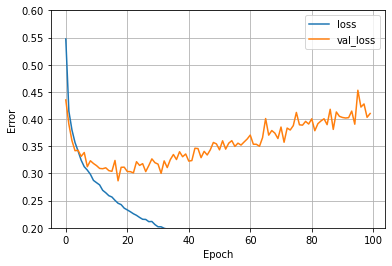

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0.2, 0.6])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)

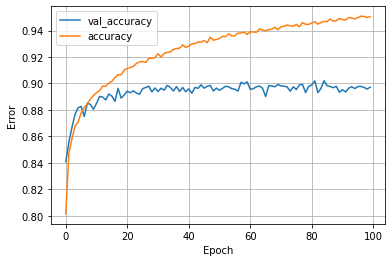

In [19]:
def plot_loss(history):
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
    plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)

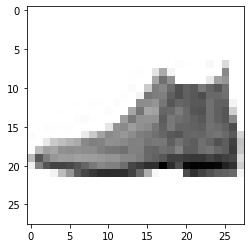

[]


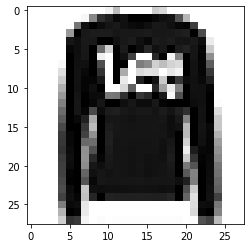

[]


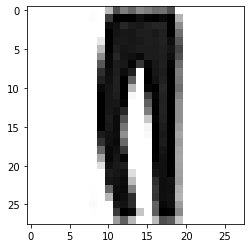

[1]


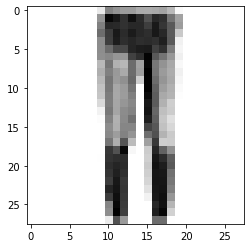

[1]


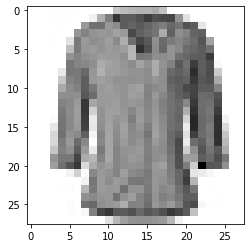

[]


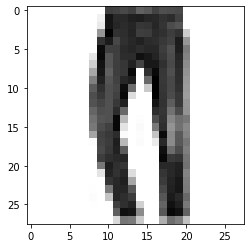

[1]


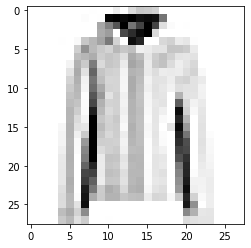

[4]


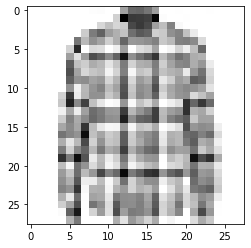

[]


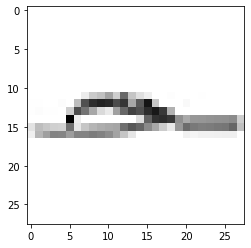

[5]


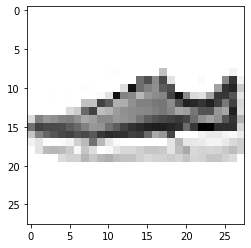

[7]


In [14]:
for sample in range(0,10):
    img = test_X[sample]
    img = tf.keras.utils.img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    fig = plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.show()
    prediction = model.predict(img)
    results = np.where(prediction == 1)[1]
    print(results)